In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
inr_high = pd.read_csv("/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/Final Project/Extracts/inr_high.csv")
inr_low = pd.read_csv("/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/Final Project/Extracts/inr_low.csv")
patient_details = pd.read_csv("/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/Final Project/Extracts/patients.csv")

In [ ]:
inr_high.head()

In [7]:
warfarin_related = ['Adverse effect of anticoagulants, initial encounter',
       'Poisoning by anticoagulants, accidental (unintentional), initial encounter',
       'Warfarin-induced coagulopathy', 'Warfarin overdosage',
       'Poisoning by anticoagulants(964.2)',
       'Warfarin toxicity, accidental or unintentional, initial encounter',
       'Warfarin overdosage, accidental or unintentional, initial encounter',
       'Anticoagulant adverse reaction, initial encounter',
       'Overdose of coumadin', 'Bleeding on Coumadin',
       'Coumadin toxicity', 'Warfarin toxicity',
       'Poisoning by warfarin sodium, accidental or unintentional, initial encounter',
       'Poisoning by warfarin sodium, undetermined intent, initial encounter',
       'Coumadin toxicity, accidental or unintentional, initial encounter',
       'Adverse effect of anticoagulants, subsequent encounter',
       'Overdose of coumadin, initial encounter',
       'Overdose of coumadin, accidental or unintentional, initial encounter',
       'Anticoagulant overdose, subsequent encounter',
       'Coumarin overdose',
       'Prothrombin time increased due to coumadin',
       'Warfarin sodium overdose, accidental or unintentional, initial encounter',
       'Anticoagulant overdose', 'Anticoagulant-induced hematuria',
       'Underdosing of anticoagulants, initial encounter',
       'Warfarin toxicity, accidental or unintentional, sequela',
       'Adverse effect of anticoagulant antagonists, vitamin k and other coagulants, initial encounter',
       'Overdose of coumadin, subsequent encounter',
       'Warfarin-induced coagulopathy, initial encounter',
       'Warfarin-induced coagulopathy, subsequent encounter']

In [8]:
inr_high_filtered = inr_high[inr_high['dx_name'].isin(warfarin_related)]
inr_low_filtered = inr_low[inr_low['dx_name'].isin(warfarin_related)]


In [30]:
inr_high_filtered['status_comment'].value_counts()

status_comment
Resolved        362
Active          172
Primary          27
Deleted          16
Started on:       2
Name: count, dtype: int64

In [9]:
pts_with_low_inr_comp = inr_low_filtered['pat_enc_csn_id'].unique()
pts_with_high_inr_comp = inr_high_filtered['pat_enc_csn_id'].unique()

In [10]:
inr_low_filtered['pat_enc_csn_id'].nunique()

49

In [11]:
inr_high_comp = inr_high[inr_high['pat_enc_csn_id'].isin(pts_with_high_inr_comp)]
inr_low_comp = inr_low[inr_low['pat_enc_csn_id'].isin(pts_with_low_inr_comp)]

In [12]:
bleeding_icds = ['D62','D683','D698', 'D699', 'I230', 'I312', 'I600', 'I601',
'I602', 'I603', 'I604', 'I605', 'I606', 'I607', 'I608', 'I609', 'R57.8',
'I610', 'I611', 'I612', 'I613', 'I614', 'I615', 'I616', 'I618', 'I619', 'I620','I621', 'I629', 'D68.32',
'I850', 'I983', 'J942', 'K226', 'K250', 'K252', 'K254', 'K256', 'K260', 'K262', 'K264', 'K266', 'K270', 'K272', 
'K274','K276', 'K280', 'K282', 'K284', 'K286', 'K290', 'K625', 'K661', 'K762', 'K920', 'K921', 'K922', 
'M250', 'N421', 'R040', 'R041', 'R042', 'R048', 'R049', 'R31', 'R58']

In [13]:
bleeding_comp = inr_high_comp[inr_high_comp['icd10'].isin(bleeding_icds)]

In [14]:
clotting_codes = ['I26', 'I26.9', 'I80', 'I81', 'I82', 'I65', 'I66', 'I63']

In [15]:
clotting_comp = inr_low_comp[inr_low_comp['icd10'].isin(clotting_codes)]['dx_name'].value_counts()

In [16]:
bleeding_comp['dx_name'].value_counts()

dx_name
Warfarin-induced coagulopathy                                       211
Acute posthemorrhagic anemia                                        175
Hemorrhagic disorder due to extrinsic circulating anticoagulants    132
Anemia due to acute blood loss                                       88
Acute blood loss anemia                                              60
Postoperative anemia due to acute blood loss                         32
Hemorrhagic shock                                                    15
Bleeding on Coumadin                                                 12
Other shock                                                           9
Acute blood loss as cause of postoperative anemia                     3
Bleeding                                                              2
Anemia due to blood loss, acute                                       2
Anemia associated with acute blood loss                               1
Hemorrhage, not elsewhere classified                    

In [36]:
inr_low_active = inr_low_comp[inr_low_comp['status_comment'] == 'Active']
inr_low_primary = inr_low_comp[inr_low_comp['status_comment'] == 'Primary']

In [89]:
inr_low_active['dx_name'].value_counts()

dx_name
Warfarin-induced coagulopathy                                                                       60
Dermatitis                                                                                          24
At high risk for hemodynamic instability                                                            24
At high risk for bleeding                                                                           24
Partial thickness burn of back of hand, initial encounter                                           18
Fall                                                                                                18
Coronary artery disease involving native coronary artery of native heart without angina pectoris    18
Chronic systolic congestive heart failure                                                           18
Essential hypertension                                                                              18
Subdural hematoma                                                

In [17]:
def to_age_group(age):
    if age != '90 or older':
        age = int(age)
        if age < 18:
            return '0-17'
        elif 19 <= age < 30:
            return '19 - 30'
        elif 31 <= age < 40:
            return '31 - 40'
        elif 41 <= age < 50:
            return '41 - 50'
        elif 51 <= age < 60:
            return '51 - 60'
        elif 61 <= age < 70:
            return '61 - 70'
        elif 71 <= age < 80:
            return '71 - 80'
        elif 81 <= age < 90:
            return '81 - 90'
        

In [18]:
patient_details['age_group'] = patient_details['age'].apply(to_age_group)

In [19]:
patient_details['age_group'].value_counts()

age_group
71 - 80    50832
81 - 90    50344
61 - 70    33788
51 - 60    20347
41 - 50     9178
31 - 40     4841
19 - 30     2376
0-17         470
Name: count, dtype: int64

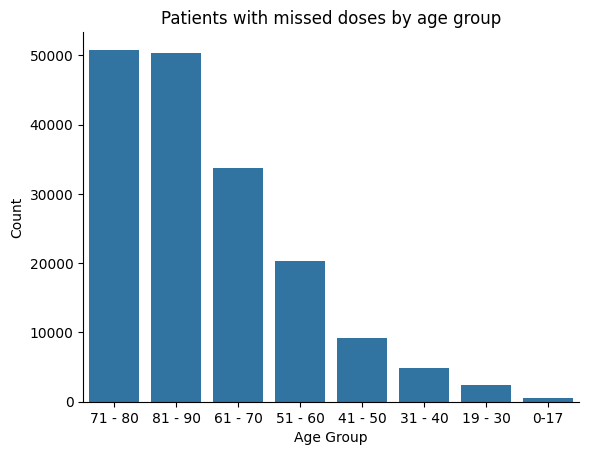

In [42]:
ax = sns.countplot(x='age_group', data=patient_details)
ax.set_title('Patients with missed doses by age group')
ax.set_xlabel("Age Group")
ax.set_ylabel("Count")
sns.despine()
plt.show()

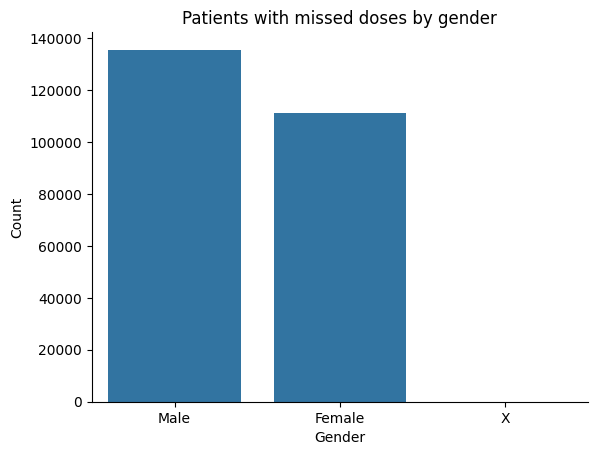

In [43]:
ax = sns.countplot(x='sex', data=patient_details)
ax.set_title('Patients with missed doses by gender')
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
sns.despine()
plt.show()

In [63]:
order

Index(['Warfarin-induced coagulopathy', 'Acute posthemorrhagic anemia',
       'Hemorrhagic disorder due to extrinsic circulating anticoagulants',
       'Anemia due to acute blood loss', 'Acute blood loss anemia',
       'Postoperative anemia due to acute blood loss', 'Hemorrhagic shock',
       'Bleeding on Coumadin', 'Other shock',
       'Acute blood loss as cause of postoperative anemia', 'Bleeding',
       'Anemia due to blood loss, acute',
       'Anemia associated with acute blood loss',
       'Hemorrhage, not elsewhere classified'],
      dtype='object', name='dx_name')

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_15359/1017640515.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels)


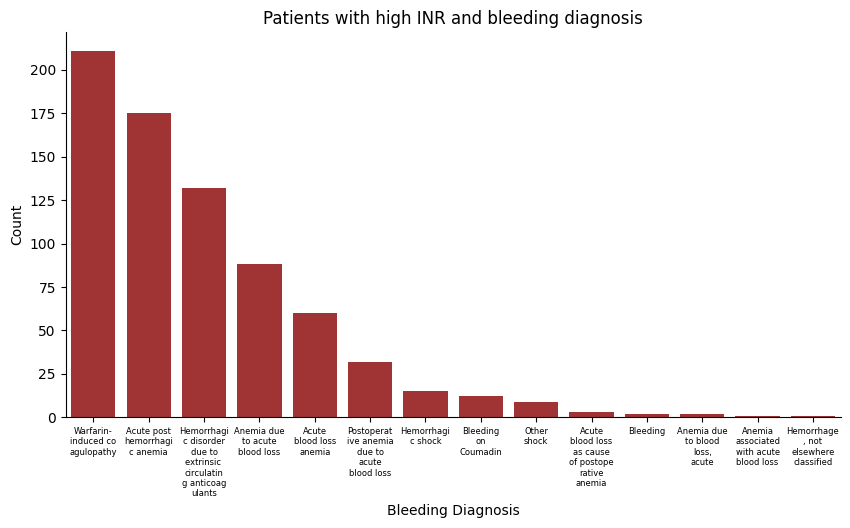

In [87]:
order = bleeding_comp['dx_name'].value_counts().index
import textwrap



plt.figure(figsize=(10, 5))
ax = sns.countplot(x='dx_name', data=bleeding_comp, order=order, color='firebrick')
ax.set_title('Patients with high INR and bleeding diagnosis')
ax.set_xlabel("Bleeding Diagnosis")
ax.set_ylabel("Count")
labels = ['Warfarin-induced coagulopathy', 'Acute posthemorrhagic anemia',
       'Hemorrhagic disorder due to extrinsic circulating anticoagulants',
       'Anemia due to acute blood loss', 'Acute blood loss anemia',
       'Postoperative anemia due to acute blood loss', 'Hemorrhagic shock',
       'Bleeding on Coumadin', 'Other shock',
       'Acute blood loss as cause of postoperative anemia', 'Bleeding',
       'Anemia due to blood loss, acute',
       'Anemia associated with acute blood loss',
       'Hemorrhage, not elsewhere classified']
wrapped_labels = [textwrap.fill(label, width=10) for label in labels]
ax.set_xticklabels(wrapped_labels)
ax.tick_params(axis='x', labelsize=6)
sns.despine()
plt.show()

In [100]:
top_categories

Index(['Warfarin-induced coagulopathy', 'Dermatitis',
       'At high risk for hemodynamic instability', 'At high risk for bleeding',
       'Partial thickness burn of back of hand, initial encounter', 'Fall',
       'Coronary artery disease involving native coronary artery of native heart without angina pectoris',
       'Chronic systolic congestive heart failure', 'Essential hypertension',
       'Subdural hematoma', 'History of stroke', 'Weakness',
       'History of lung cancer', 'Paralysis of left vocal cord',
       'S/P AVR (aortic valve replacement)'],
      dtype='object', name='dx_name')

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_15359/905502037.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels)


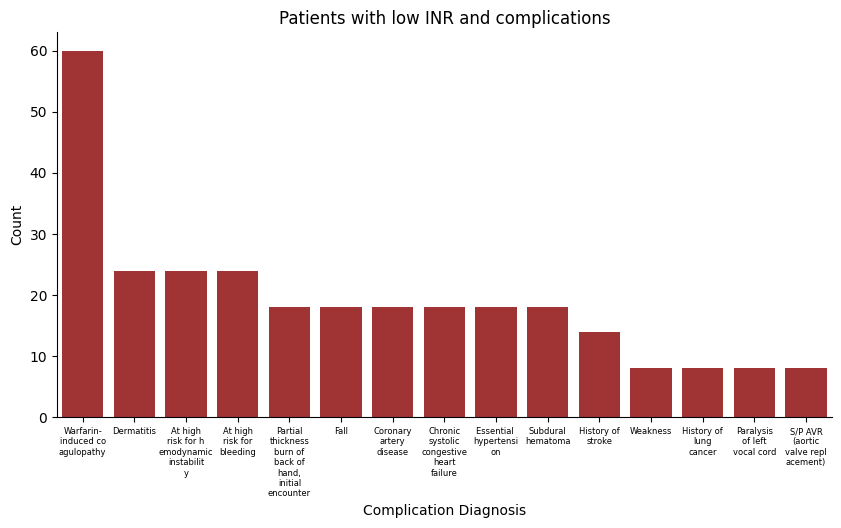

In [102]:
top_categories = inr_low_active['dx_name'].value_counts().head(15).index

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='dx_name', data=inr_low_active, order=top_categories, color='firebrick')
ax.set_title('Patients with low INR and complications')
ax.set_xlabel("Complication Diagnosis")
ax.set_ylabel("Count")
labels = ['Warfarin-induced coagulopathy', 'Dermatitis',
       'At high risk for hemodynamic instability', 'At high risk for bleeding',
       'Partial thickness burn of back of hand, initial encounter', 'Fall',
       'Coronary artery disease',
       'Chronic systolic congestive heart failure', 'Essential hypertension',
       'Subdural hematoma', 'History of stroke', 'Weakness',
       'History of lung cancer', 'Paralysis of left vocal cord',
       'S/P AVR (aortic valve replacement)']
wrapped_labels = [textwrap.fill(label, width=10) for label in labels]
ax.set_xticklabels(wrapped_labels)
ax.tick_params(axis='x', labelsize=6)
sns.despine()
plt.show()